# Assignment 3 - Supervised Learning

## *Ishan Gupta*
Netid: ig55

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [857]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)** $$f(x) = \prod_{i=1}^{N} P(y_{i} = 1|x_{i})^{y_{i}}P(y_{i} = 0|x_{i})^{1 - y_{i}}$$
$$ = \prod_{i=1}^{N} \sigma(w^{T}x_{i})^{y_{i}}[1 - \sigma(w^{T}x_{i})^{1 - y_{i}}]$$


**(b)** 
$$  -ln(\prod_{i=1}^{N} \sigma(w^{T}x_{i})^{y_{i}}[1 - \sigma(w^{T}x_{i})^{1 - y_{i}}])$$
$$  =-\sum_{i=1}^{N}y_{i}*ln(w^{T}x_{i}) + (1 - y_{i})ln(1 - \sigma(w^{T}x_{i}))$$


**(c)**
$$\dfrac{\partial C}{\partial w_0} = \sum_{i=1}^{i=N}y_{i} - (\sigma( w^{T}x_{i}))$$
$$\dfrac{\partial C}{\partial w_1} = \sum_{i=1}^{i=N}(y_{i} - (\sigma( w^{T}x_{i})))x_{i,1}$$
$$\dfrac{\partial C}{\partial w_2} = \sum_{i=1}^{i=N}(y_{i} - (\sigma( w^{T}x_{i})))x_{i,2}$$

**(d)**
$$ w_{new,j} = w_{j} + \eta(\sum_{i=1}^{i=N}(y_{i} - (\sigma( w^{T}x_{i})))x_{i,j}) $$

In [186]:
import requests
import numpy as np
import io
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A3_Q1_data.csv"
s=requests.get(url).content
training_data = np.genfromtxt(io.StringIO(s.decode('utf-8')),delimiter=',')

In [187]:
y = training_data[1:, 2]
X = training_data[1:, [0,1]]

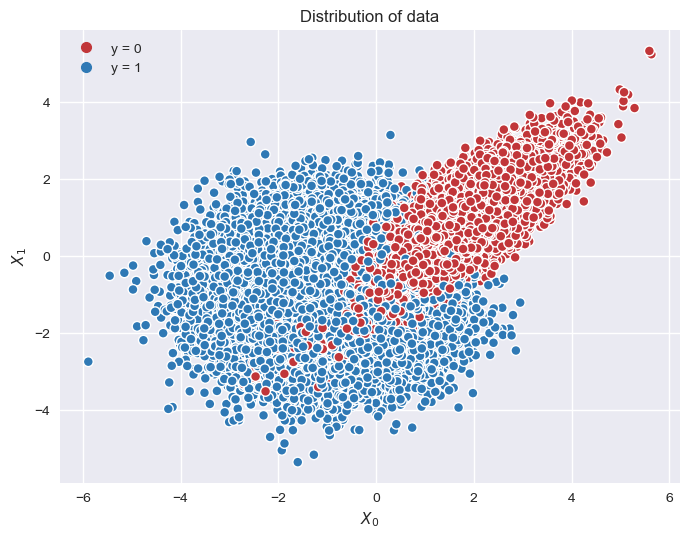

In [188]:
f, ax = plt.subplots(figsize=(8, 6), dpi = 100)
scatter = ax.scatter(X[:,0], X[:,1],
           c=y, s=50,
           cmap="RdBu", vmin=-.2,
           vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_xlabel("$X_{0}$")
ax.set_ylabel("$X_{1}$")
ax.set_title("Distribution of data")
plt.legend(handles=scatter.legend_elements()[0], labels=['y = 0', 'y = 1'])
plt.show()

**(e)** The data looks almost separable, although a clear linear separation might be present. Since this is a classification problem and there seems to an almost linear boundary, logistic regression would be a good choice.

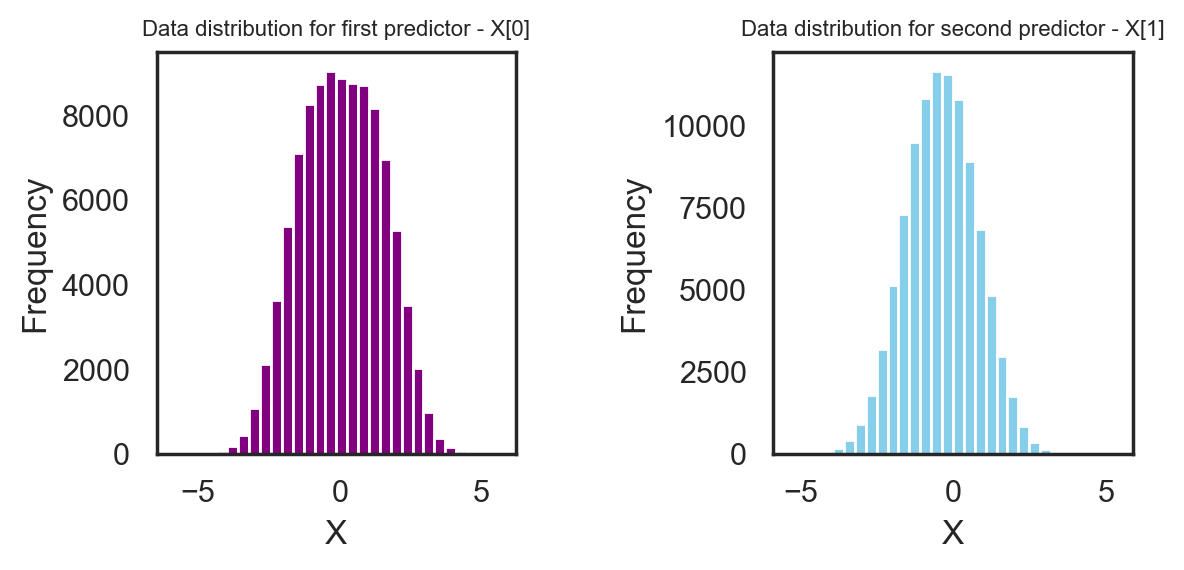

In [861]:
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html
from scipy import stats
# print('The descriptive statistics for predictor variables are:')
# print(stats.describe(X))
#### Draw histograms for X
colors = ['purple', 'skyblue']
figure, axes = plt.subplots(1, 2, figsize=(7,4), dpi = 100)
figure.tight_layout(pad=5.0)
# figure(num=None, figsize=(8, 8), dpi=100)
# figure.title("Data distribution for predictors")
axes[0].hist(X[:,0], bins = 30, color = colors[0])
axes[0].set_xlabel("X")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Data distribution for first predictor - X[0]", fontsize=8)
axes[1].hist(X[:,1], bins = 30, color = colors[1])
axes[1].set_xlabel("X")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Data distribution for second predictor - X[1]", fontsize=8)
plt.show()

**(f)** 

i)The predictor variables are normally distributed.

ii)The minimum values of both the predictors are **{{stats.describe(X).minmax[0]}}**.

iii)The maximum values of both the predictors are **{{stats.describe(X).minmax[1]}}**.

iv)The mean of both the predictors are **{{stats.describe(X).mean}}**

v) The variance of both the predictors are **{{stats.describe(X).variance}}**

There are no missing values, and there are no major scale differences using the data above. So no preprocessing of the data is needed.

In [189]:
class LogisticClassification:
    
    def __init__(self, **kwargs):
        self.lr = kwargs['lr'] if 'lr' in kwargs else 0.0001
        self.num_iters = kwargs['num_iters'] if 'num_iters' in kwargs else 100
        self.stop = kwargs['stop'] if 'stop' in kwargs else False
        self.stop_at = kwargs['stop_at'] if 'stop_at' in kwargs else 10**-6
        
    def fit(self, x, y, *args):
        params = args[0] if (len(args) == 1) else np.zeros(len(x[0])+ 1)
        return Fit(x,y,self).compute(params)
        
        
        

class Fit:
    def __init__(self, x, y, clf):
        self.x = x
        self.y = y
        self.clf = clf
        self.params_history = []
        
    def compute(self, params):
        for i in range(self.clf.num_iters):
            predictions = self.predict_proba(params)
            old_params = params.copy()
            self.params_history.append(old_params)
            self.best_params = old_params
            params = self.get_updated_params(i, params, predictions)
            if self.check_condition(old_params, params):
                return self
        return self
    
    def check_condition(self, params, new_params):
        if self.clf.stop:
            if abs(np.linalg.norm(params) - np.linalg.norm(new_params)) < self.clf.stop_at:
                return True
        return False
            
    
    def get_updated_params(self, i, params, predictions):
        param_differences = self.compute_params(i, params, predictions)
        for index in range(len(params)):
            params[index] += self.clf.lr*param_differences[index]
        return params
        
    
    def compute_params(self, i, params, predictions):
        parameter_changes = np.zeros(len(params))
        for j in range(len(params)):
            parameter_changes = self.compute_gradient(i, j, parameter_changes, predictions)
        return parameter_changes
    
    def compute_gradient(self, i, j, parameter_changes, predictions):
        parameter_changes_copy = parameter_changes.copy()
        for k in range(len(self.y)):
            parameter_changes_copy[j] += self.gradient_difference(j, k, predictions)
        return parameter_changes_copy
            
    def gradient_difference(self, j, k, predictions):
        if j == 0:
            return self.y[k] - predictions[k]
        else:
            return (self.y[k] - predictions[k])*(self.x[k][j-1])

    def predict_proba(self, params):
        predicted_probabilities = []
        for entry in self.x:
            predicted_probabilities.append(predic_proba_single_record(entry, params))
        return predicted_probabilities
    
    def predic_proba_single_record(record, params):
        return sigmoid(params[0] + np.dot(record,params[1:]))

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

**(g)** Please refer to the **predict_proba** and **predict_proba_single_record** of the **Fit** class in the above cell. 

In [190]:
### Some custom methods to calculate cost history
def predic_proba_single_record(x, params):
    return sigmoid(params[0] + np.dot(x,params[1:]))

def predict_proba(x, params):
    predicted_probabilities = []
    for entry in x:
        predicted_probabilities.append(predic_proba_single_record(entry, params))
    return predicted_probabilities

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def error(y_actual, y_hat):
    c = 0
    for ind, entry in enumerate(y_actual):
        if entry == 1:
            c += np.log(y_hat[ind])
        else:
            c += np.log(1 - y_hat[ind])
    return -c

def cost(params, x, y):
    return error(y, predict_proba(x, params))/float(len(x))

def costs_test_train(x_train, y_train, x_test, y_test, params_history):
    costs_train, costs_test = [], []
    for weights in params_history:
        cost_train = cost(weights, x_train, y_train)
        cost_test = cost(weights, x_test, y_test)
        costs_train.append(cost_train)
        costs_test.append(cost_test)
    return (costs_train, costs_test)

**(h)** Please refer to the **cost** and **cost_test_train** function above

**(i,j)** Please refer to the **Fit** class for the definition of these functions. The **check_condtion** method is responsible for stopping criteria. **get_updated_params** for implementation of gradient decent

**(k)**

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [192]:
## This is our base case
clf_1 = LogisticClassification(lr = .0001, num_iters = 100,
                       stop = True, stop_at = 10**-6)
fit_1 = clf_1.fit(x_train, y_train)
cost_histories_1 = costs_test_train(x_train, y_train, x_test, y_test, fit_1.params_history)

In [886]:
### different learning rate - Learning rate set to 0.00001
clf_2 = LogisticClassification(lr = .00001, num_iters = 100,
                       stop = True, stop_at = 10**-6)
fit_2 = clf_2.fit(x_train, y_train)
cost_histories_2 = costs_test_train(x_train, y_train, x_test, y_test, fit_2.params_history)

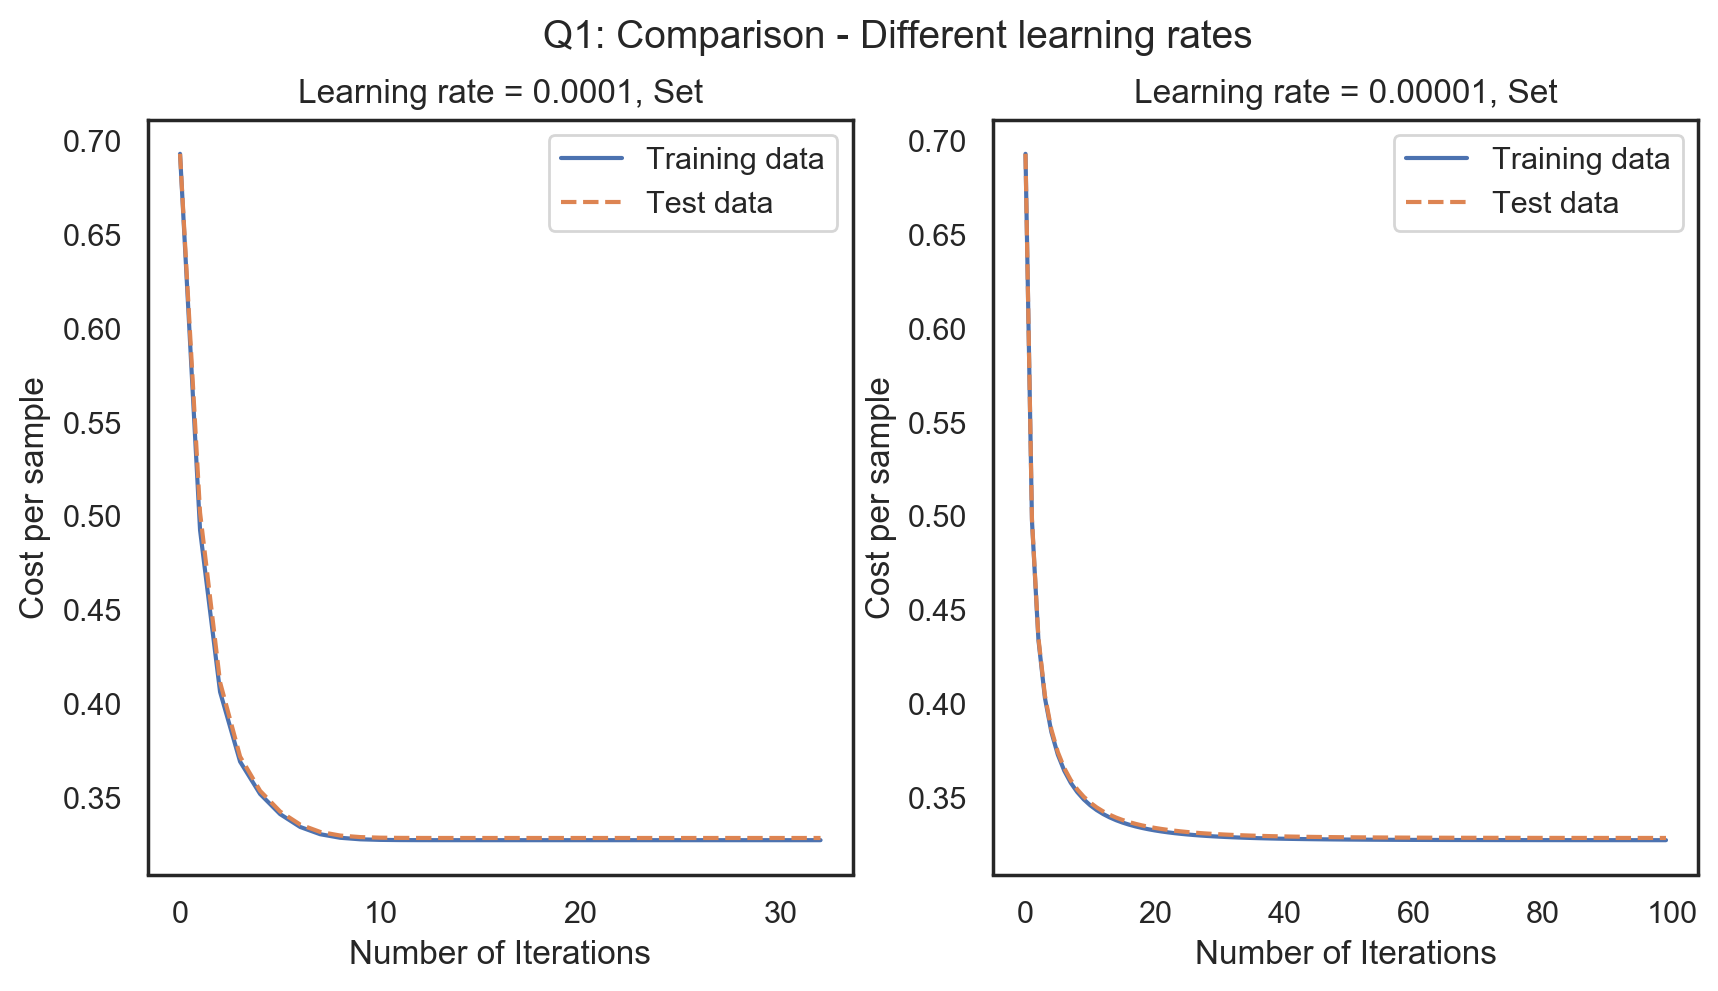

In [887]:
fig, axes = plt.subplots(1,2,figsize=(10,5), dpi = 100)

axes[0].set_ylabel('Cost per sample')
axes[0].set_xlabel('Number of Iterations')
axes[0].plot(range(len(cost_histories_1[0])), cost_histories_1[0], label = "Training data")
axes[0].plot(range(len(cost_histories_1[1])), cost_histories_1[1], label = "Test data", linestyle = '--')
axes[0].set_title('Learning rate = 0.0001, Set')
axes[0].legend()
axes[1].set_ylabel('Cost per sample')
axes[1].set_xlabel('Number of Iterations')
axes[1].plot(range(len(cost_histories_2[0])), cost_histories_2[0], label = "Training data")
axes[1].plot(range(len(cost_histories_2[1])), cost_histories_2[1], label = "Test data", linestyle = '--')
axes[1].set_title('Learning rate = 0.00001, Set')
axes[1].legend()
fig.suptitle('Q1: Comparison - Different learning rates', fontsize=14)

plt.show()

In [888]:
### Different initialization of beginning weights
clf_3 = LogisticClassification(lr = .0001, num_iters = 100,
                       stop = True, stop_at = 10**-6)
fit_3 = clf_3.fit(x_train, y_train, [1,1,1])
cost_histories_3 = costs_test_train(x_train, y_train,
                                    x_test, y_test,
                                    fit_3.params_history)

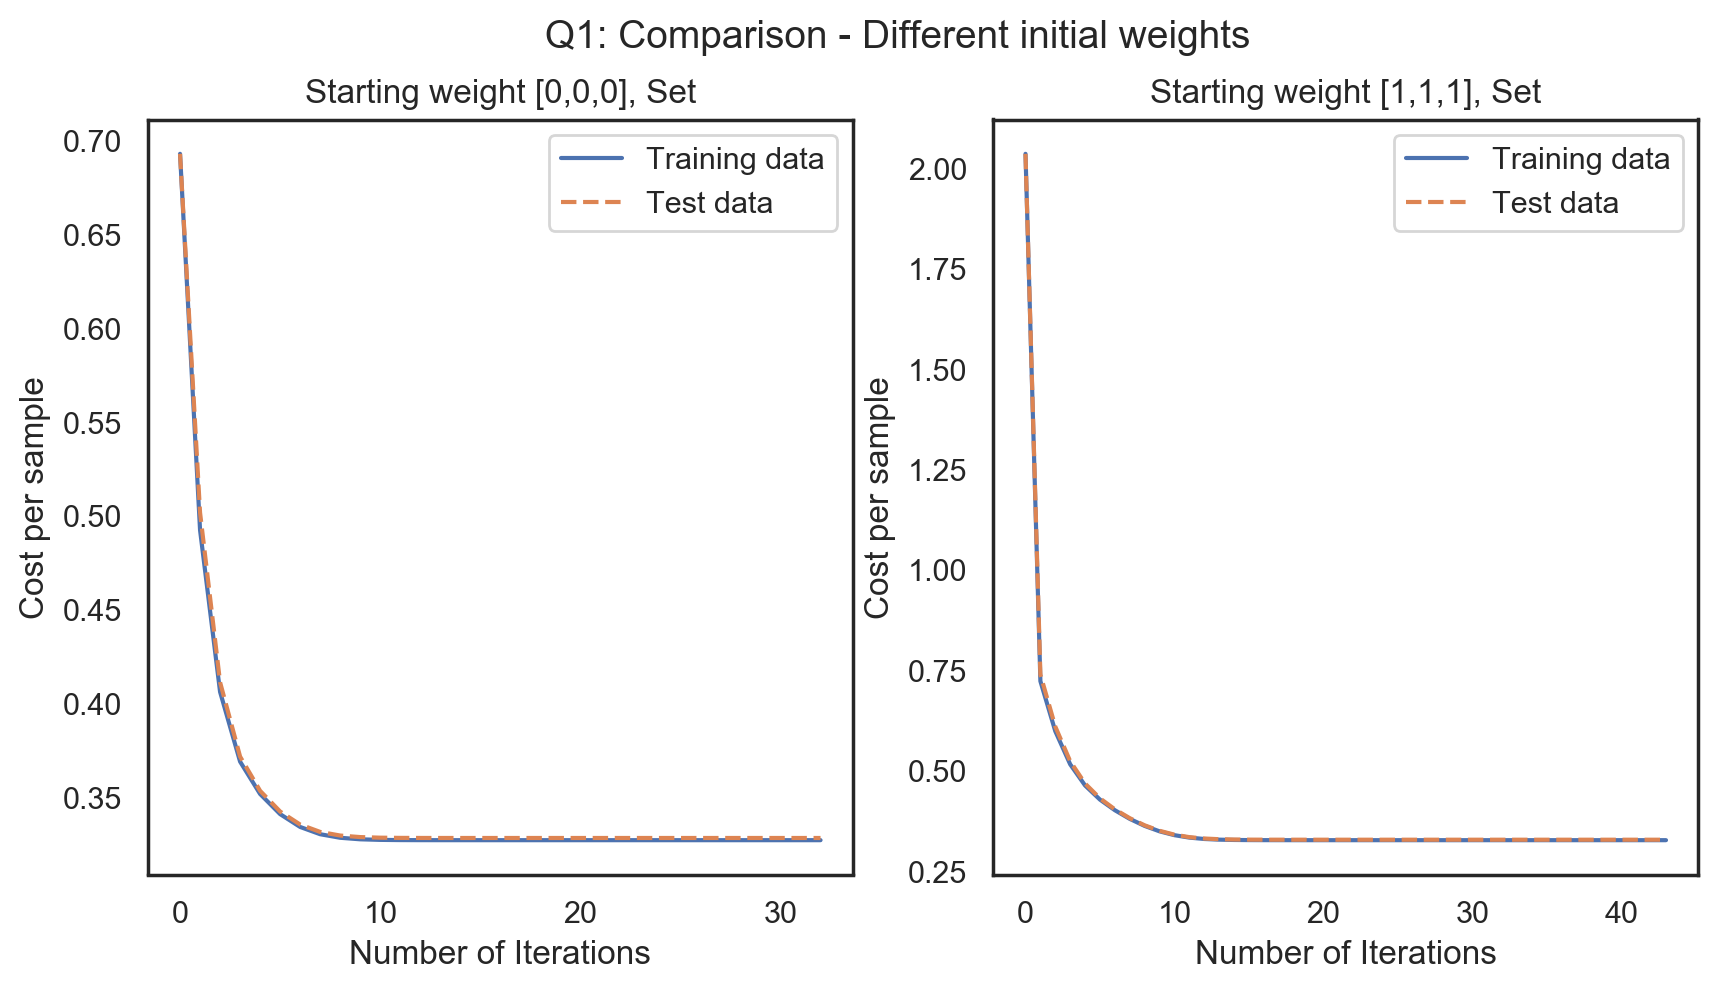

In [889]:
fig, axes = plt.subplots(1,2,figsize=(10,5), dpi = 100)

axes[0].set_ylabel('Cost per sample')
axes[0].set_xlabel('Number of Iterations')
axes[0].plot(range(len(cost_histories_1[0])),
             cost_histories_1[0],
             label = "Training data")
axes[0].plot(range(len(cost_histories_1[1])),
             cost_histories_1[1],
             label = "Test data",
             linestyle = '--')
axes[0].set_title('Starting weight [0,0,0], Set')
axes[0].legend()
axes[1].set_ylabel('Cost per sample')
axes[1].set_xlabel('Number of Iterations')
axes[1].plot(range(len(cost_histories_3[0])),
             cost_histories_3[0],
             label = "Training data")
axes[1].plot(range(len(cost_histories_3[1])),
             cost_histories_3[1],
             label = "Test data",
             linestyle = '--')
axes[1].set_title('Starting weight [1,1,1], Set')
axes[1].legend()
fig.suptitle('Q1: Comparison - Different initial weights', fontsize=14)
plt.show()

In [890]:
### Different initialization of iterations, no stop condition, only 20 iterations
clf_4 = LogisticClassification(lr = .0001, num_iters = 20)
fit_4 = clf_4.fit(x_train, y_train)
cost_histories_4 = costs_test_train(x_train, y_train,
                                    x_test, y_test,
                                    fit_4.params_history)

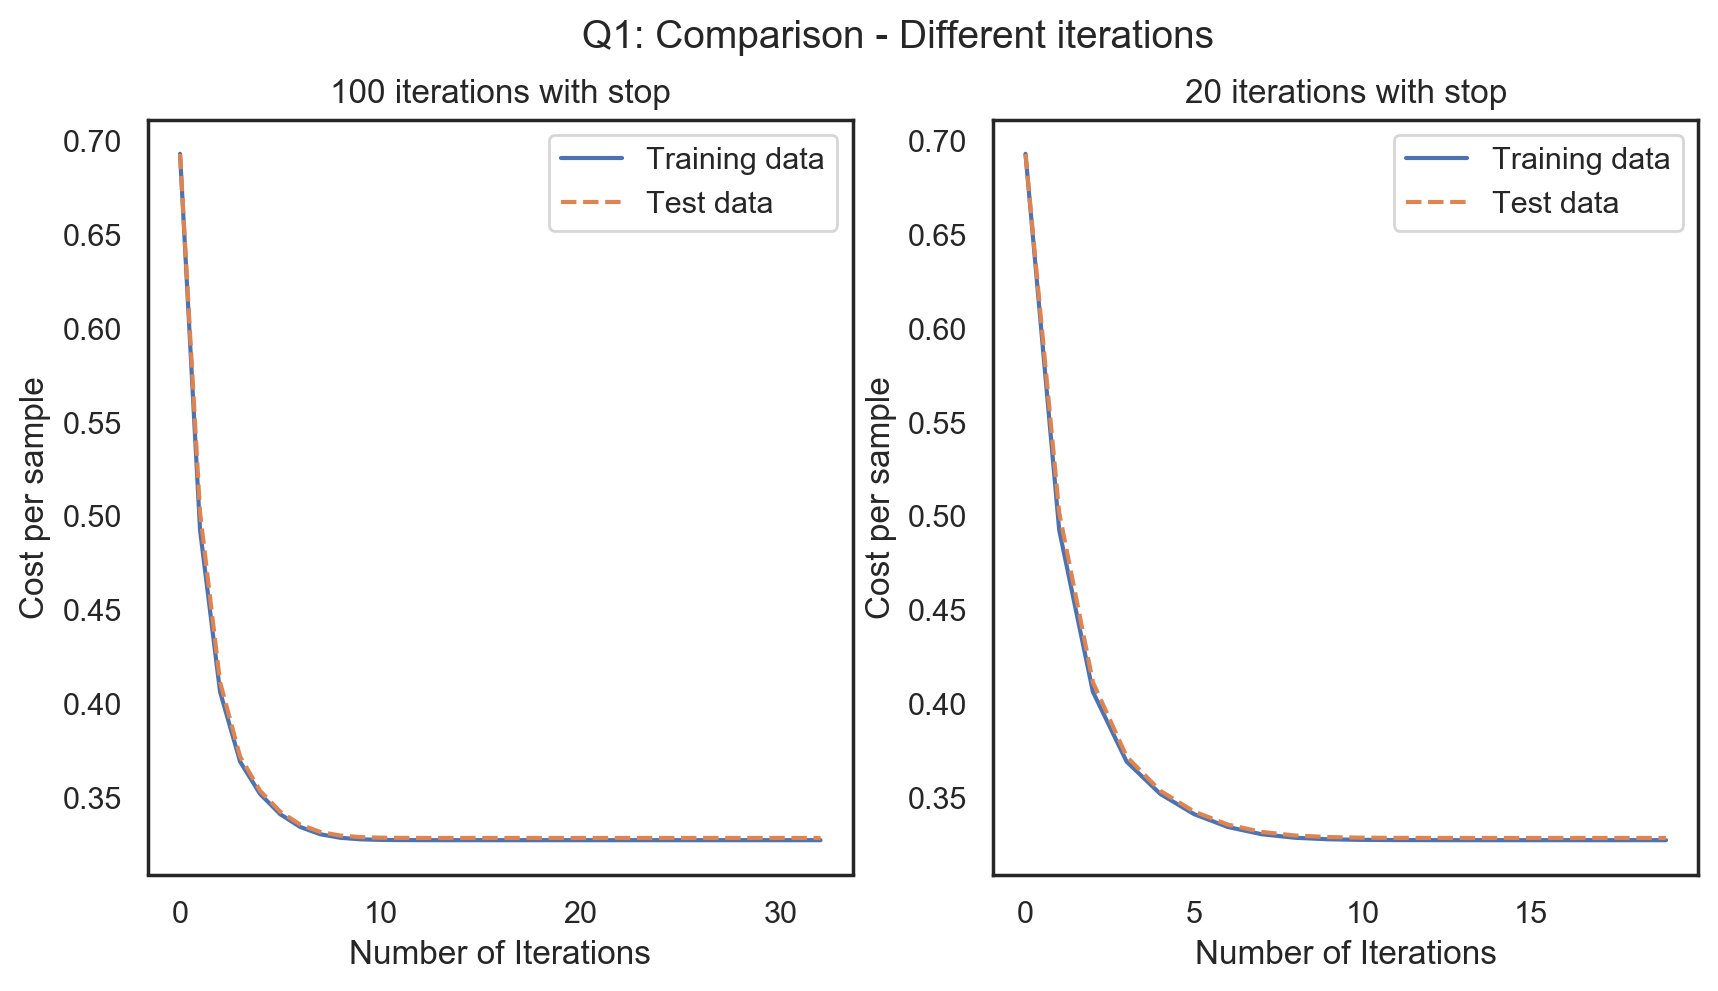

In [891]:
fig, axes = plt.subplots(1,2,figsize=(10,5), dpi = 100)

axes[0].set_ylabel('Cost per sample')
axes[0].set_xlabel('Number of Iterations')
axes[0].plot(range(len(cost_histories_1[0])),
             cost_histories_1[0],
             label = "Training data")
axes[0].plot(range(len(cost_histories_1[1])),
             cost_histories_1[1],
             label = "Test data",
             linestyle = '--')
axes[0].set_title('100 iterations with stop')
axes[0].legend()
axes[1].set_ylabel('Cost per sample')
axes[1].set_xlabel('Number of Iterations')
axes[1].plot(range(len(cost_histories_4[0])),
             cost_histories_4[0],
             label = "Training data")
axes[1].plot(range(len(cost_histories_4[1])),
             cost_histories_4[1],
             label = "Test data",
             linestyle = '--')
axes[1].set_title('20 iterations with stop')
axes[1].legend()
fig.suptitle('Q1: Comparison - Different iterations', fontsize=14)
plt.show()

**(k)**

(i) Our base case is a learning rate of 0.0001, with max number of iterations set to 100 and stop condtition set to $10^{-6}$ as the difference of l2 norm between weight params. The cost for this model per sample is {{round(cost_histories_1[0][-1],4)}} for training set, and {{round(cost_histories_1[1][-1],4)}} for test set.

(ii) First we try reducing the learning rate to 0.00001, keeping other factors constant. We observe that now the model takes longer to converge and uses all of the 100 iterations. Whereas with our base case model converges only at 34 iterations. The cost remains almost the same. The cost for this model per sample is {{round(cost_histories_2[0][-1],4)}} for training set, and {{round(cost_histories_2[1][-1],4)}} for test. Please refer figure "Comparison - Different learning rates"

(iii) We try experimenting with two sets of initial weights [0,0,0] and [1,1,1], keeping other factors constant. We observe that now the model takes longer to converge when the initial weights are [1,1,1] (~45 compared to 34). This is because of our final parameters being closer to [0,0,0]. The cost remains per sample remain a bit higher. The cost for this model per sample is {{round(cost_histories_3[0][-1],4)}} for training set, and {{round(cost_histories_3[1][-1],4)}} for test. Please refer figure "Comparison - Different initial weights"

(iv) We try experimenting with two max iterations of 20 and 100 (with stop condition), keeping other factors constant. We observe that now the model does not completely converge at 20 iterations. The cost remains lower when the number of iterations are set to 100. The cost for this model per sample is {{round(cost_histories_4[0][-1],4)}} for training set, and {{round(cost_histories_4[1][-1],4)}} for test. Please refer figure "Comparison - Different iterations"

Keeping the above results in mind, our base condition is optimized for time, cost as well as test error rate.

**(l)**

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt

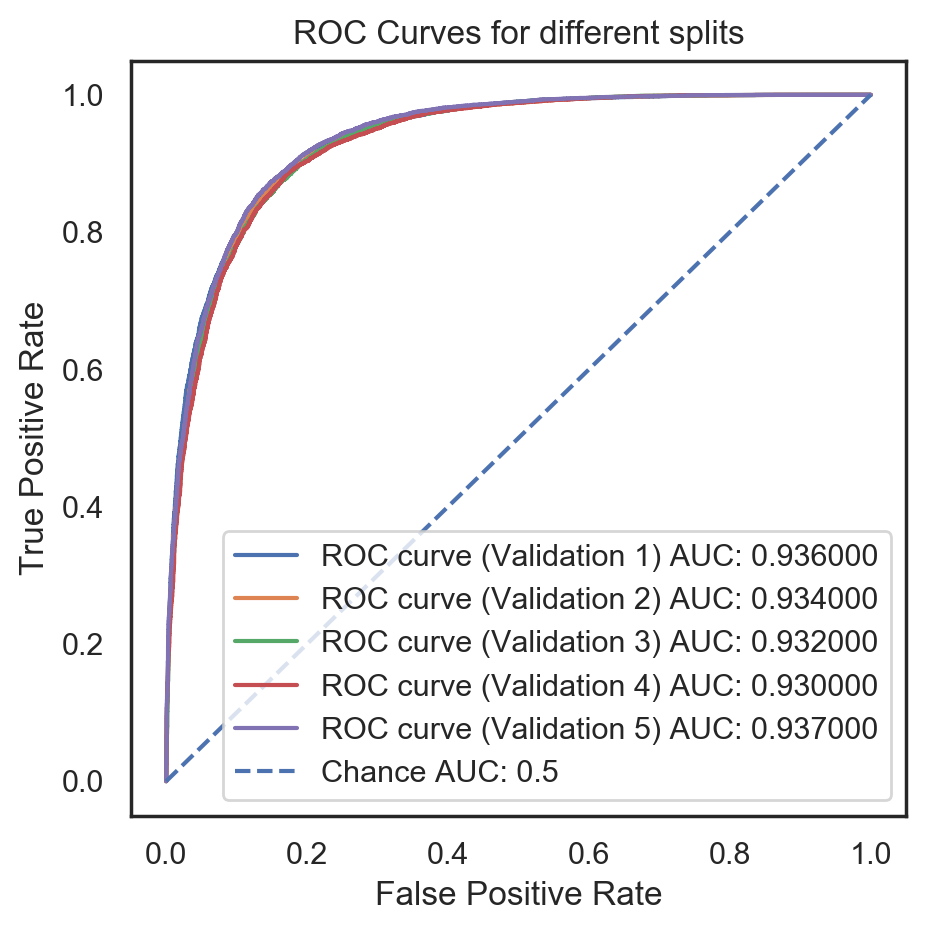

In [898]:
skf = StratifiedKFold(n_splits=5)
i = 0
plt.figure(num=None, figsize=(5, 5), dpi=100)
for train_index, test_index in skf.split(X, y):
    i += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    fit = clf_1.fit(X_train, y_train)
    y_hat = predict_proba(X_test, fit.best_params)
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    area_under_curve = round(auc(fpr, tpr),3)
    plt.plot(fpr, tpr,
             label='ROC curve (Validation %d) AUC: %f' % (i, area_under_curve))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color='b',
         label='Chance AUC: 0.5')
plt.legend()
plt.title('ROC Curves for different splits')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**(m)** We use cross validation to

i) To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

ii) Observe accuracy on unseen data.

iii) Not in this particular case, but we can use it to tune hyper-parameters as well

**(n)**

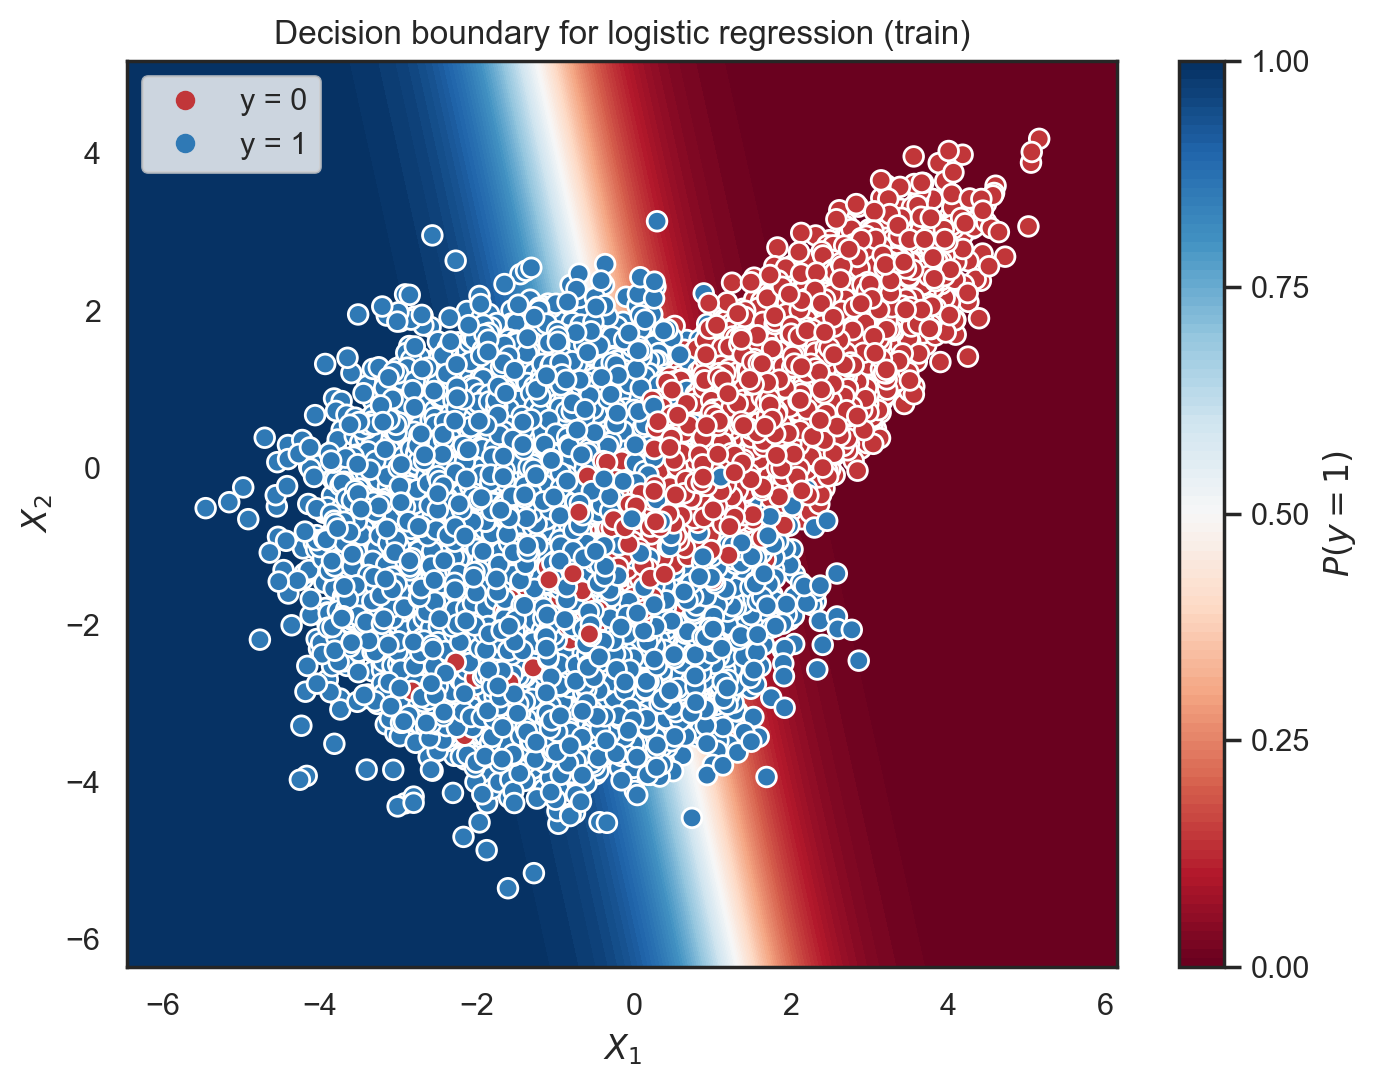

In [894]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)
import seaborn as sns
sns.set(style="white")
h = 0.01
f, ax = plt.subplots(figsize=(8, 6), dpi = 100)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
xx, yy = np.meshgrid(np.arange(x_train[:, 0].min() - 1,
                               x_train[:,0].max() + 1, 
                               h),
                     np.arange(x_train[:,1].min() - 1,
                               x_train[:,1].max() + 1,
                               h))
grid = np.c_[xx.ravel(), yy.ravel()]
# probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
probs = np.array(predict_proba(grid,
                               fit_1.best_params)).reshape(xx.shape)


contour = ax.contourf(xx, yy,
                      probs, 100,
                      cmap="RdBu",
                      vmin=0, vmax=1)
scatter = ax.scatter(x_train[:,0], x_train[:, 1],
           c=y_train, s=50,
           cmap="RdBu", vmin=-.2,
           vmax=1.2,
           edgecolor="white", linewidth=1)
plt.legend(handles=scatter.legend_elements()[0], labels=['y = 0', 'y = 1'])
ax.set(aspect="equal",
       xlabel="$X_1$", ylabel="$X_2$",
       title = "Decision boundary for logistic regression (train)")
plt.show()

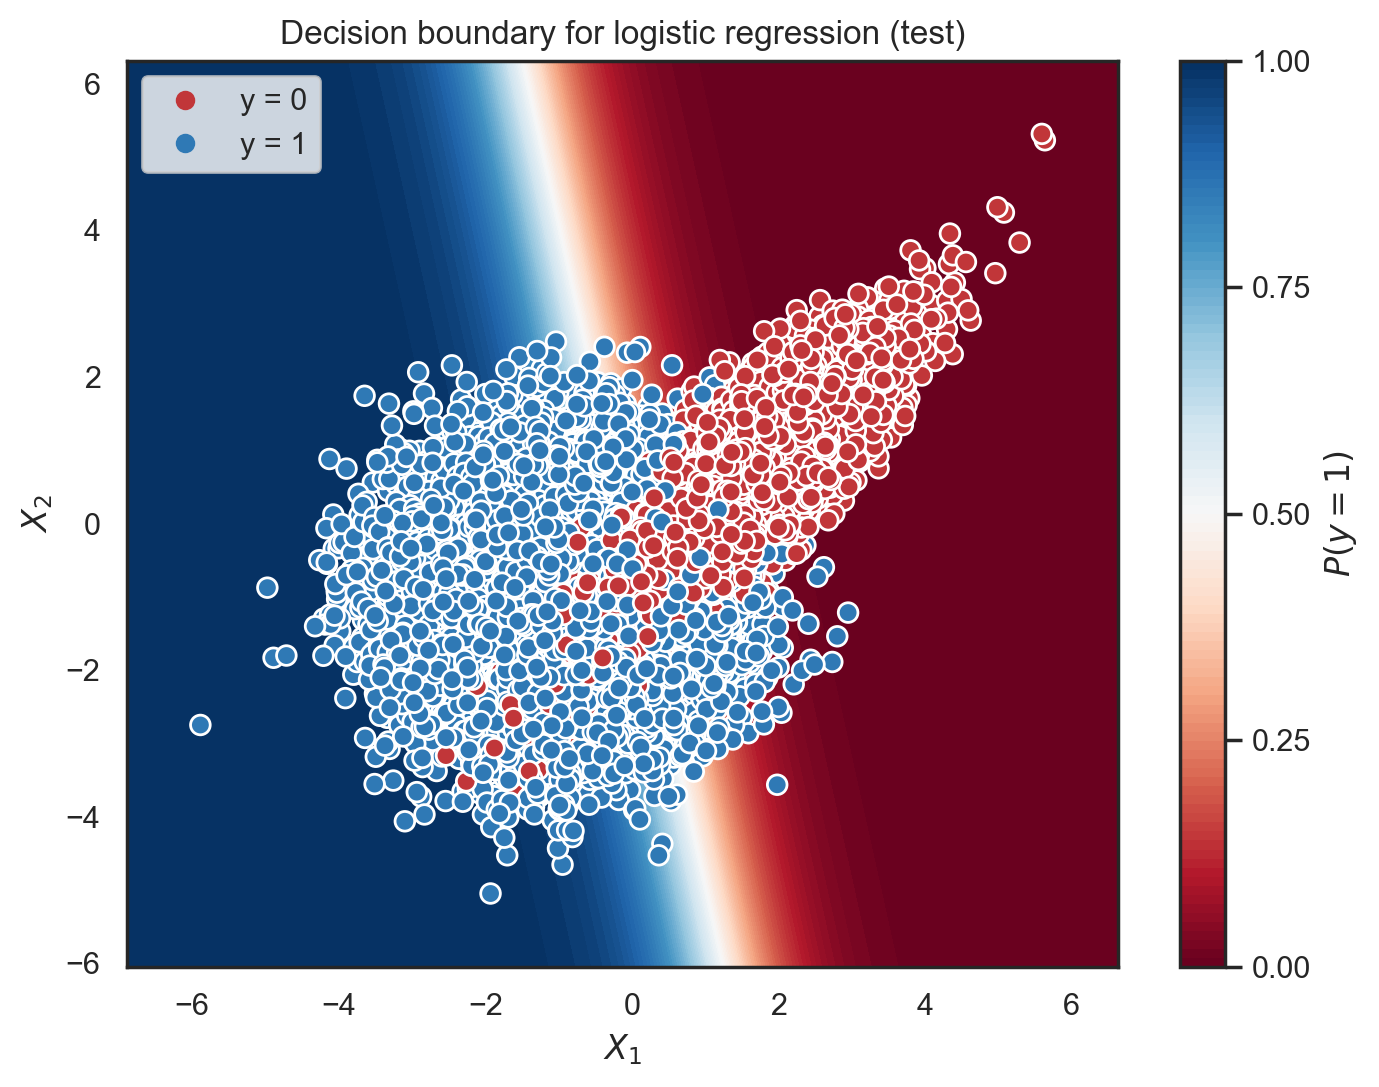

In [895]:
sns.set(style="white")
h = 0.01
f, ax = plt.subplots(figsize=(8, 6), dpi = 100)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
xx, yy = np.meshgrid(np.arange(x_test[:, 0].min() - 1,
                               x_test[:,0].max() + 1, h),
                     np.arange(x_test[:,1].min() - 1,
                               x_test[:,1].max() + 1, h))
grid = np.c_[xx.ravel(), yy.ravel()]
# probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
probs = np.array(predict_proba(grid,
                               fit_1.best_params)).reshape(xx.shape)


contour = ax.contourf(xx, yy, probs, 100,
                      cmap="RdBu",
                      vmin=0, vmax=1)

scatter= ax.scatter(x_test[:,0], x_test[:, 1],
           c=y_test, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.legend(handles=scatter.legend_elements()[0], labels=['y = 0', 'y = 1'])

ax.set(aspect="equal",
       xlabel="$X_1$",
       ylabel="$X_2$",
       title = "Decision boundary for logistic regression (test)")
plt.show()

**(n)** Overall the model does a decent job at separation of data. Only drawback is since it is linear decision boundary separating the points which are aggregated together is not possible. We can improve this by having a non-linear more flexible model. 

**(o)** 

In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
fit_1 = clf_1.fit(x_train, y_train)
y_hat = predict_proba(x_test, fit_1.best_params)

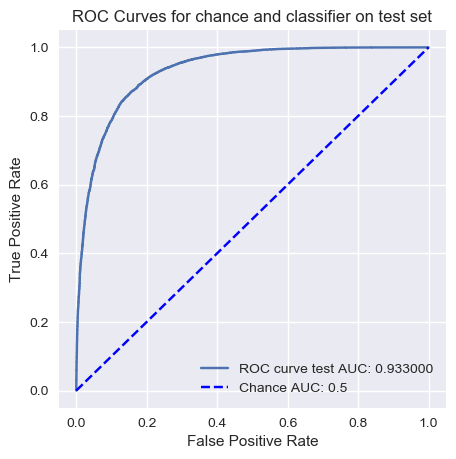

In [195]:
plt.figure(num=None, figsize=(5, 5), dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
area_under_curve = round(auc(fpr, tpr),3)
plt.plot(fpr, tpr,
             label='ROC curve test AUC: %f' % (area_under_curve))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color='b',
         label='Chance AUC: 0.5')
plt.legend()
plt.title('ROC Curves for chance and classifier on test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**Answer**

**(a)**

In [899]:
# import gzip
# import numpy as np

# f = gzip.GzipFile('/Users/ishangupta/Downloads/train-images-idx3-ubyte.gz', "r")
# np.load(f, allow_pickle = True)
import numpy as np
import matplotlib.pyplot as plt
import struct

from mlxtend.data import loadlocal_mnist
X_train, y_train = loadlocal_mnist(
        images_path='/Users/ishangupta/Downloads/train-images.idx3-ubyte', 
        labels_path='/Users/ishangupta/Downloads/train-labels.idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='/Users/ishangupta/Downloads/t10k-images.idx3-ubyte', 
        labels_path='/Users/ishangupta/Downloads/t10k-labels.idx1-ubyte')

X_train_img = X_train.reshape(X_train.shape[0], 28,28)
X_test_img = X_test.reshape(X_test.shape[0], 28,28)
y_train[y_train != 3] = 0
y_train[y_train == 3] = 1
y_test[y_test != 3] = 0
y_test[y_test == 3] = 1
X_train = X_train/255.0
X_test = X_test/255.0
img = X_train_img

**(b)**

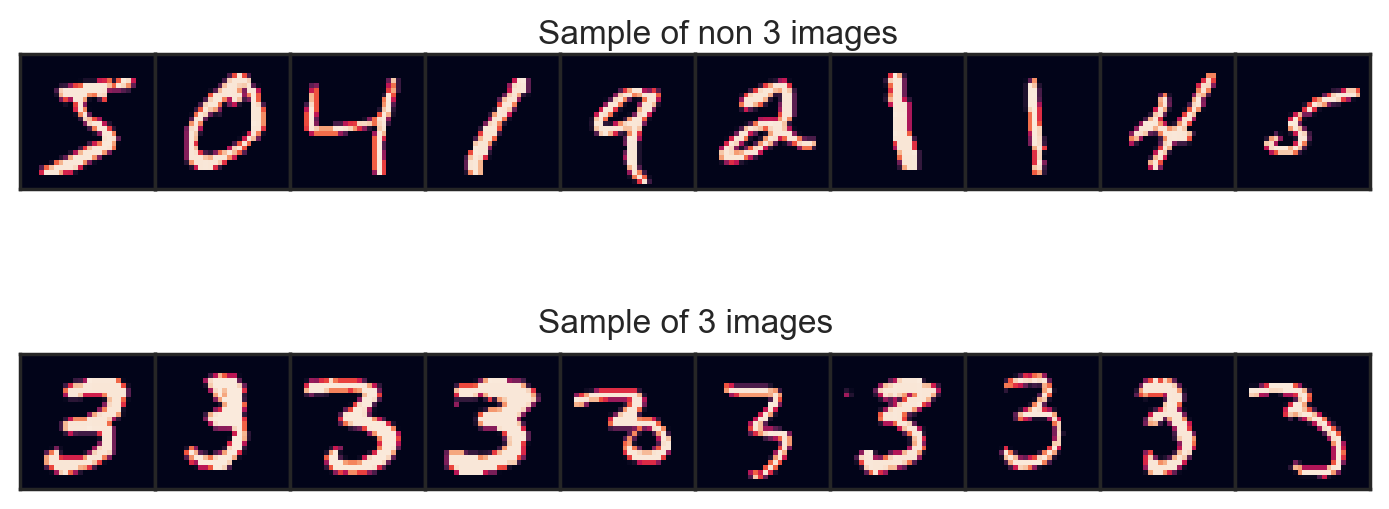

In [782]:
from matplotlib import gridspec
img_non_3 = img[y_train == 0][:10]
img_3 = img[y_train == 1][:10]

nrow = 2
ncol = 10

fig = plt.figure(figsize=(10, 10), dpi = 200) 

gs = gridspec.GridSpec(nrow, ncol, 
                       wspace=0.0, hspace=0.0,
                       top=0.3, bottom=0.00,
                       left=0.17, right=0.845) 

for i in range(nrow):
    for j in range(ncol):
        ax= plt.subplot(gs[i,j])
        if i == 0:
            ax.imshow(img_non_3[j])
        else:
            ax.imshow(img_3[j])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
plt.text(-145,-5,"Sample of 3 images")
plt.text(-145, -65, "Sample of non 3 images")
plt.show()


**(c)** As we can see in the histogram below, the classes are imbalanced. This might lead to us overfitting to class 0 that is non 3s.

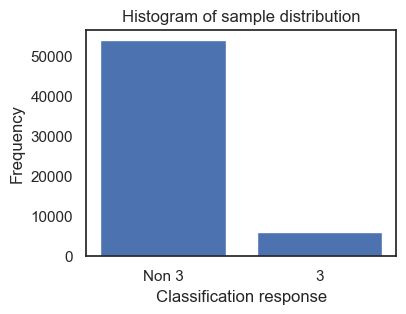

In [783]:
plt.figure(num=None, figsize=(4, 3), dpi=100)
plt.title("Histogram of sample distribution", fontsize=12)
values, counts = np.unique(y_train, return_counts=True)
values = list(values)
for index, val in enumerate(values):
    if val == 0:
        values[index] = "Non 3"
    else:
        values[index] = "3"
plt.bar(values, counts)
plt.xlabel("Classification response")
plt.ylabel("Frequency")
plt.show()

**(d)**

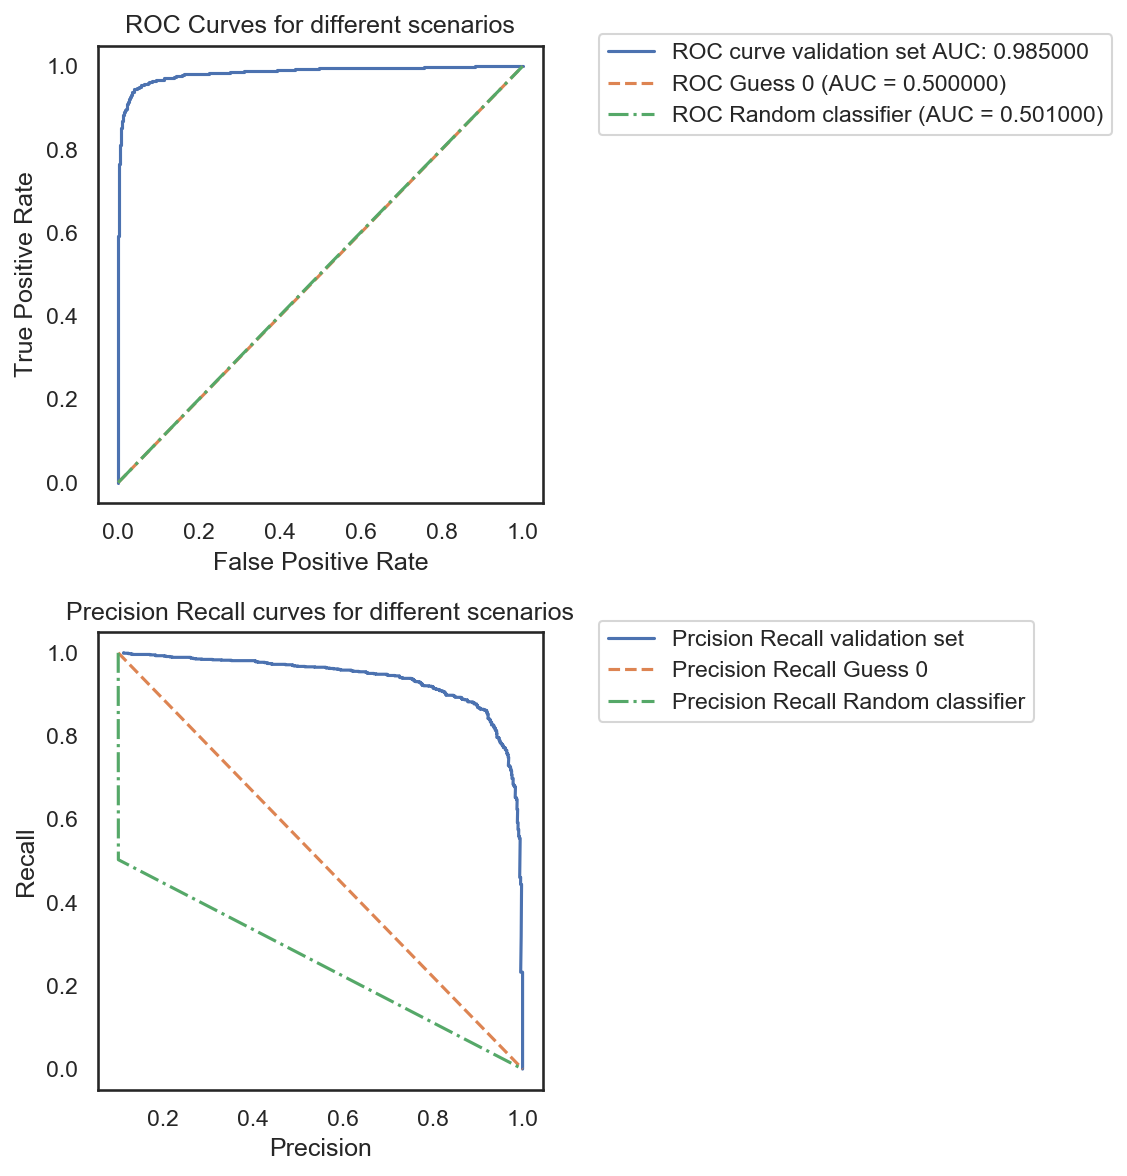

In [784]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
precision_recalls = []
fig, axes = plt.subplots(2,1, figsize=(8, 8), dpi=150)
i = 0
ls = ['-','--','-.',':']
l = ls[i%4]
i += 1
# X_train, X_test, y_train, y_test = train_test_split(img, lbl, test_size=0.30)
clf = LogisticRegression(solver='sag', max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_hat[:,1])
precision, recall, thresholds = precision_recall_curve(y_test, y_hat[:,1])
axes[1].plot(precision, recall,
             linestyle = l,
             label='Prcision Recall validation set')

area_under_curve = round(auc(fpr, tpr),3)
axes[0].plot(fpr, tpr,
             linestyle = l,
             label='ROC curve validation set AUC: %f' % (area_under_curve))


fpr_0, tpr_0, thresholds = roc_curve(y_test,
                                     np.zeros(len(X_test)))
precision_0, recall_0, thresholds = precision_recall_curve(y_test,
                                                           np.zeros(len(X_test)))
l = ls[i%4]

area_under_curve_0 = round(auc(fpr_0, tpr_0),3)
axes[0].plot(fpr_0, tpr_0,
             linestyle = l,
             label='ROC Guess 0 (AUC = %f)' % (area_under_curve_0))
axes[1].plot(precision_0, recall_0,
             linestyle = l,
             label='Precision Recall Guess 0')

l = ls[(i+1)%4]
random_guesses = np.random.randint(2, size=len(y_test))
fpr_1, tpr_1, thresholds = roc_curve(y_test, random_guesses)
precision_1, recall_1, thresholds = precision_recall_curve(y_test, random_guesses)
area_under_curve_1 = round(auc(fpr_1, tpr_1),3)
axes[0].plot(fpr_1, tpr_1,
             linestyle = l,
             label='ROC Random classifier (AUC = %f)' % (area_under_curve_1))
axes[1].plot(precision_1,
             recall_1,linestyle = l,
             label='Precision Recall Random classifier')

axes[0].set_title('ROC Curves for different scenarios')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(bbox_to_anchor=(1.1, 1.05))

axes[1].set_title('Precision Recall curves for different scenarios')
axes[1].set_xlabel('Precision')
axes[1].set_ylabel('Recall')
axes[1].legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()


**(d)** Logistic regression classifier performs well (AUC: 0.985), and we can see that this classifier performs better than a random classifier or a only 0 predictor. It might be the case that this data is overfitting to the training data.


**(e)**

In [900]:
penalties = [0.1, 0.01, 0.001, 0.0001]
all_classifiers = []
for penalty in penalties:
    clf = LogisticRegression(C = penalty, max_iter = 2000,
                             penalty='l1', solver='saga')
    fit = clf.fit(X_train, y_train)
    prediction_probas = fit.predict_proba(X_test)
    predictions = fit.predict(X_test)
    all_classifiers.append({"clf": clf, "fit": fit, 
                            "predictions": predictions,
                            "prediction_proba": prediction_probas})

In [903]:
from sklearn.metrics import f1_score
f1_scores, area_under_roc, costs, num_coeffs = [], [], [], []
for el in all_classifiers:
    fpr, tpr, thresholds = roc_curve(y_test, el['prediction_proba'][:,1])
    area_under_roc.append(round(auc(fpr, tpr),3))
    num_coeffs.append(len(el['fit'].coef_[0][el['fit'].coef_[0] != 0]))
    costs.append(error(y_test, el['prediction_proba'][:,1]))
    f1_scores.append(f1_score(y_test, el['predictions'], average='binary'))
    

    
    
    

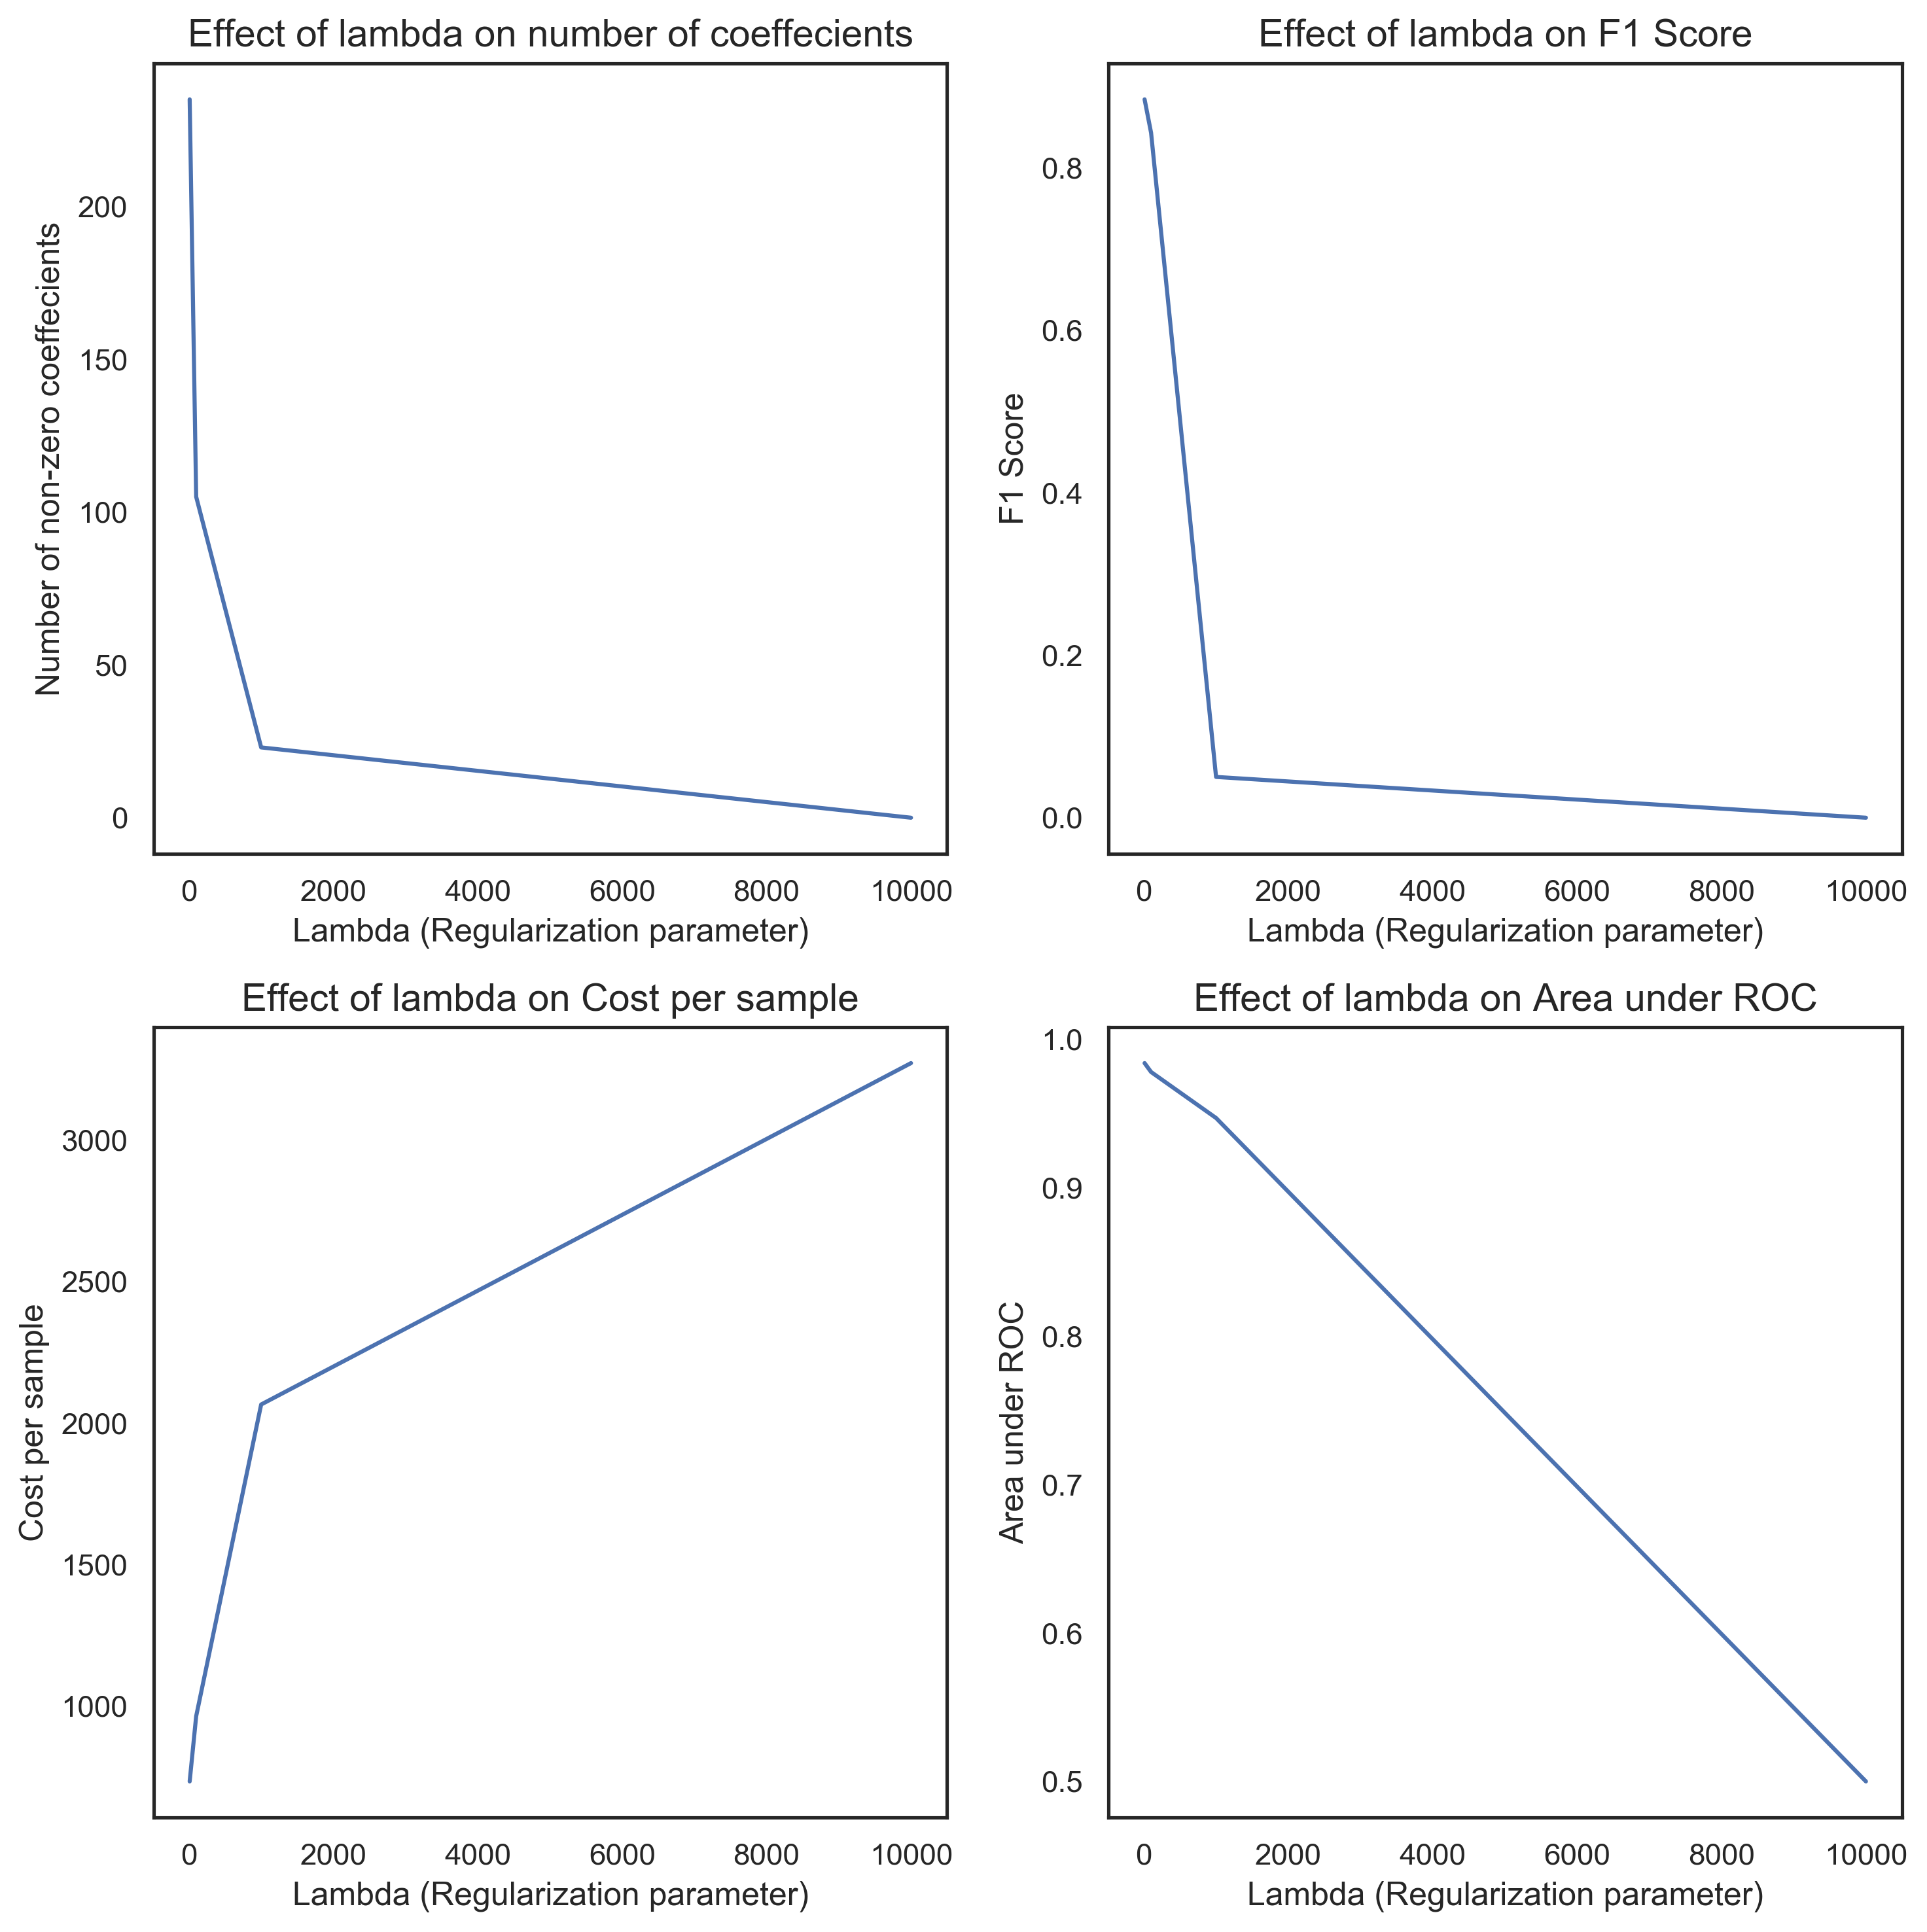

In [904]:
from matplotlib.transforms import blended_transform_factory
fig, axes = plt.subplots(2,2, figsize=(10, 10), dpi=150)
lambdas = 1/np.array(penalties)
axes[0][0].plot(lambdas, num_coeffs)
axes[0][1].plot(lambdas, f1_scores)
axes[1][0].plot(lambdas, costs)
axes[1][1].plot(lambdas, area_under_roc)

axes[0][0].set_xlabel("Lambda (Regularization parameter)")
axes[0][1].set_xlabel("Lambda (Regularization parameter)")
axes[1][1].set_xlabel("Lambda (Regularization parameter)")
axes[1][0].set_xlabel("Lambda (Regularization parameter)")


axes[0][0].set_ylabel("Number of non-zero coeffecients")
axes[0][1].set_ylabel("F1 Score")
axes[1][0].set_ylabel("Cost per sample")
axes[1][1].set_ylabel("Area under ROC")


axes[0][0].set_title("Effect of lambda on number of coeffecients", fontsize = 14)
axes[0][1].set_title("Effect of lambda on F1 Score", fontsize = 14)
axes[1][0].set_title("Effect of lambda on Cost per sample", fontsize = 14)
axes[1][1].set_title("Effect of lambda on Area under ROC", fontsize = 14)

plt.tight_layout()

plt.show()



**(e)** With the above plots

(i) We observe number of non-zero coeffecients reduce as value of $\lambda$ increases. This makes sense because the coeffecient penalty increases and more coeffecients are reduced to 0.

(ii) We observe F1-score reduces as value of $\lambda$ increases. A greater F1-score indicates a better model. Since as the value of $\lambda$ increases, a lot of predictors are lost, and the precisision and recall become worse.

(iii) Cost per sample incrases and AUC decreases as $\lambda$ increases. The explanation is the same to the points above.

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

**(a)**

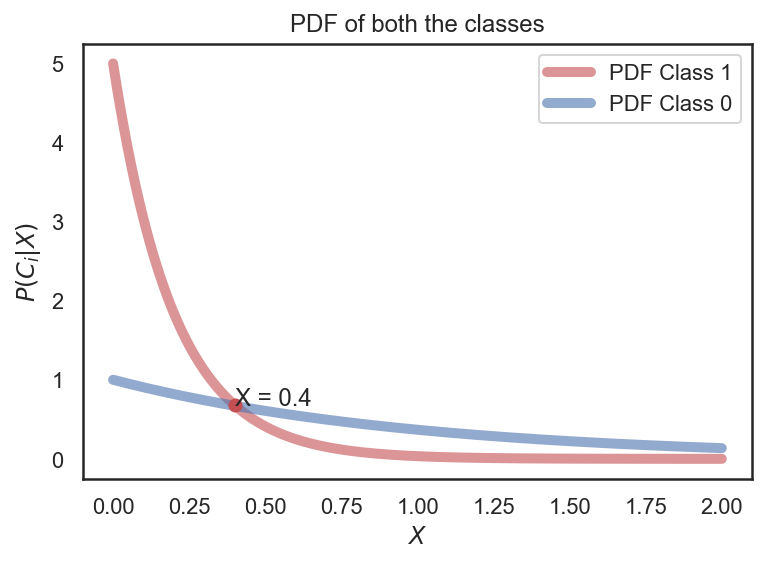

In [914]:
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 2, num=1000)
ax.plot(x, expon.pdf(x, 0, 0.2),
       'r-', lw=5, alpha=0.6, label='PDF Class 1')
ax.plot(x, expon.pdf(x),
       'b', lw=5, alpha=0.6, label='PDF Class 0')
ax.legend()
ax.set_xlabel("$X$")
idx = np.argwhere(np.diff(np.sign(expon.pdf(x, 0, 0.2) - expon.pdf(x)))).flatten()
ax.plot(x[idx], expon.pdf(x, 0, 0.2)[idx], 'ro')
ax.text(x[idx], expon.pdf(x, 0, 0.2)[idx], "X = "+str(round(x[idx][0],2)))
ax.set_ylabel("$P(C_{i}|X)$")
ax.set_title("PDF of both the classes")
plt.show()

**(a)**

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$ 

$$P(C_1|X) = \frac{\lambda_1 e^{-\lambda_1 x}*P(C_1)}{P(X)}$$

**<center>Decision rule to find class C1</center>**

$$P(C_1|X) > P(C_0|X)$$

$$ \frac{5e^{-5x}P(C_1)}{P(X)} > \frac{e^{-x}P(C_0)}{P(X)}$$

$$ 5e^{-5x} > e^{-x} $$

$$ x < \frac{ln(5)}{4}$$


**Therefore whenever the x > ln(5)/4 the class is 0 else 1**

**(c)** 
In the plot we can see that when the value is less than ln(5)/4 (0.40), P(C|X) is very high for class 1. We can see later the value of PDF of class 0 is higher. We can see from the plot the intersection of the curves and it holds true with our derivation. This condition is drawn from the PDF.

In [984]:
url = "https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A3_Q3_train.csv"
s=requests.get(url).content
training_data = np.genfromtxt(io.StringIO(s.decode('utf-8')),delimiter=',')

url = "https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A3_Q3_test.csv"
s=requests.get(url).content
test_data = np.genfromtxt(io.StringIO(s.decode('utf-8')),delimiter=',')

In [985]:
x = training_data[1:, [1]]
y = training_data[1:, 2].astype(int)

x_test = test_data[1:, [1]]
y_test = test_data[1:, 2].astype(int)

In [986]:
y_hat = np.zeros(len(y_test))
y_hat[x_test.ravel() < np.log(5)/4] = 1

In [987]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat)
error_rate = 1 - accuracy

In [991]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, solver='sag', multi_class = 'ovr').fit(x, y)
y_hat_logis = clf.predict(x_test)
accuracy_logis = accuracy_score(y_test, y_hat_logis)
error_rate_logis = 1 - accuracy_logis

$$\sigma(w^{T}x) > 0.5$$

$$\sigma(-3.974915x + 1.60360071)  > 0.5$$

$$ \frac{1}{1 + e^{(3.974915x - 1.60360071)}} >  0.5$$

$$ 1 >  e^{(3.974915x - 1.60360071)} $$

$$ 0 >  3.974915x - 1.60360071 $$

$$ 0.4034301890732255 > x$$

**(d)** The error rate for the Bayes classifier is **{{error_rate}}**

**(e)** The error rate for the Logistic classifier is **{{error_rate_logis}}**. The error rate is slightly greater than the Bayes classifier

**(f)** The decision boundary for logistic regression is **0.4034301890732255** and the decision boundary for Bayes classifier is **{{np.log(5)/4}}**. The decision boundary is slightly greater for logistic regression which can be attribute to a the higher error rate.

**(g)** Yes the decision boundary will change. The value of $x^{*}$ will be greater. Since the chances of obtaining $P(C_{1}|X)$ will become higher



## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**ANSWER**

**(a)** In this project I will choose the Kickstarter dataset for analysis. The goal of this project is to see what is the current state of the project given the attributes of the Kickstarter campaign. By the current state we mean that if the project is bound to be a success or a failure. This project is interesting because with the number of startups coming up on Kickstarter every day, it would be interesting to figure out if a particular template of projects is helpful or not. Also, it is challenging at the same time because there is no intution around which companies will be a success or a failure

**(b)** The dataset is chosen from https://www.kaggle.com/kemical/kickstarter-projects/data. Let's load up the data and do some basic EDA. Plots to follow after the EDA

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
df = pd.read_csv("/Users/ishangupta/Downloads/kickstarter-projects/ks-projects-201801.csv")

In [76]:
df.shape

(378661, 15)

In [77]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [78]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [79]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [108]:
df = df[df['state'].isin(['successful', 'failed'])]
df.dropna(subset=['usd pledged'], inplace=True)
df.dropna(subset=['name'], inplace=True)
df.shape

(331462, 15)

In [81]:
## Ensuring there are no duplicates of this data
duplicates = df[df.duplicated(subset='ID')]
duplicates.shape

(0, 15)

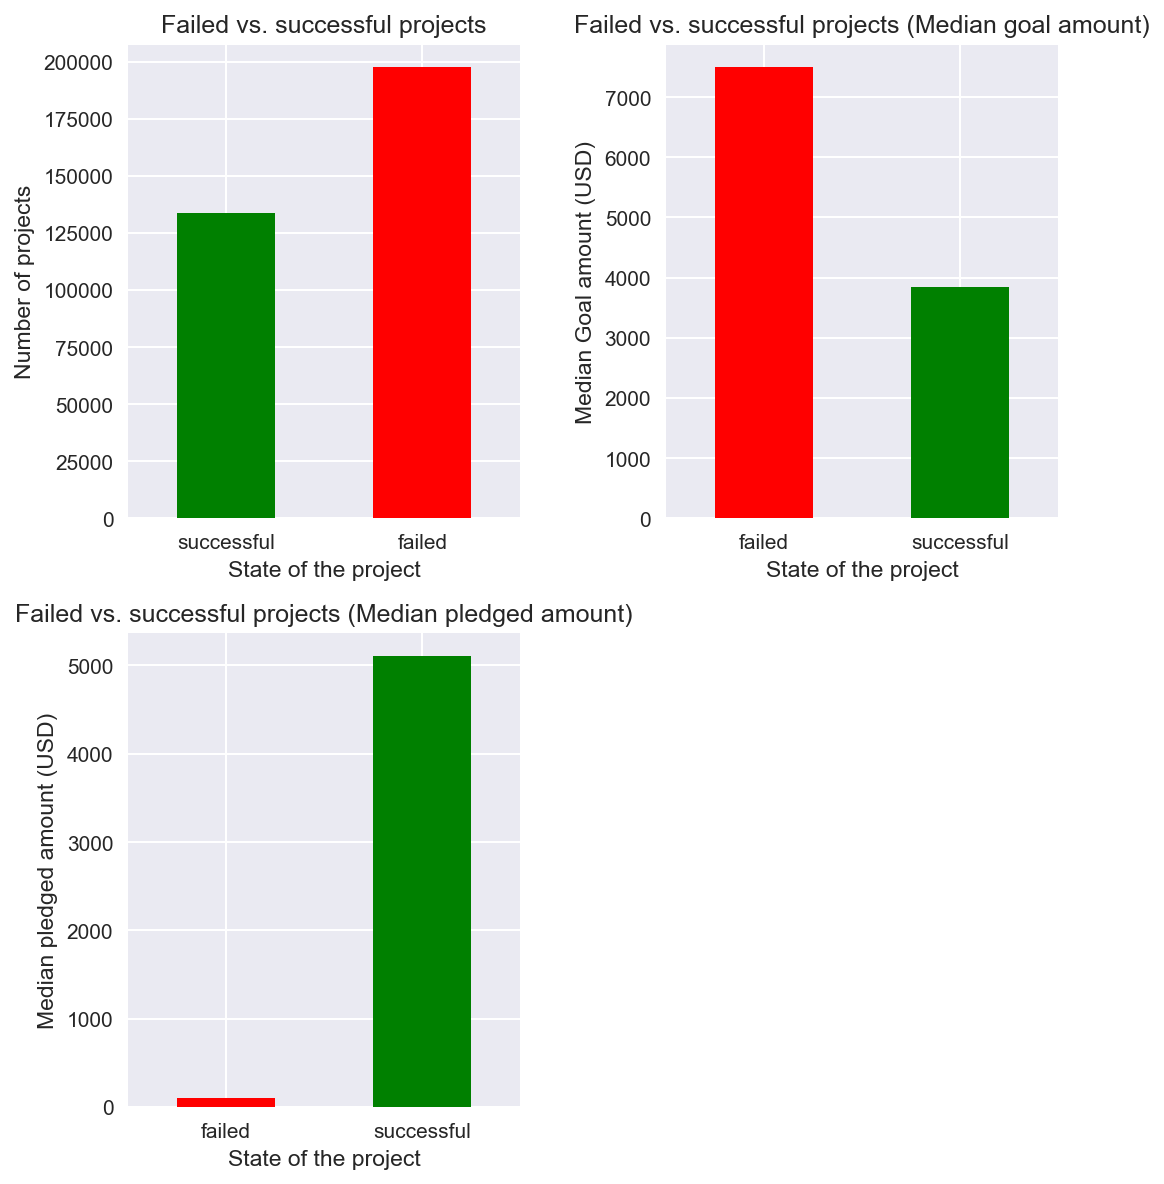

In [89]:
# fig = None
fig, axes = plt.subplots(2,2, figsize=(8, 8), dpi=150)
df['state'].value_counts(ascending=True).plot(kind='bar', ax = axes[0][0], color=['green', 'red'], rot=0)
axes[0][0].set_title('Failed vs. successful projects')
axes[0][0].set_xlabel('State of the project')
axes[0][0].set_ylabel('Number of projects')


df.groupby('state').usd_goal_real.median().plot(kind='bar', ax = axes[0][1], color=['red', 'green'], rot=0)
axes[0][1].set_title('Failed vs. successful projects (Median goal amount)')
axes[0][1].set_xlabel('State of the project')
axes[0][1].set_ylabel('Median Goal amount (USD)')


df.groupby('state').usd_pledged_real.median().plot(kind='bar', ax = axes[1][0], color=['red', 'green'], rot=0)
axes[1][0].set_title('Failed vs. successful projects (Median pledged amount)')
axes[1][0].set_xlabel('State of the project')
axes[1][0].set_ylabel('Median pledged amount (USD)')

axes[1][1].axis("off")
fig.subplots_adjust(hspace=0.5,wspace = 0.5)
fig.tight_layout()

plt.show()

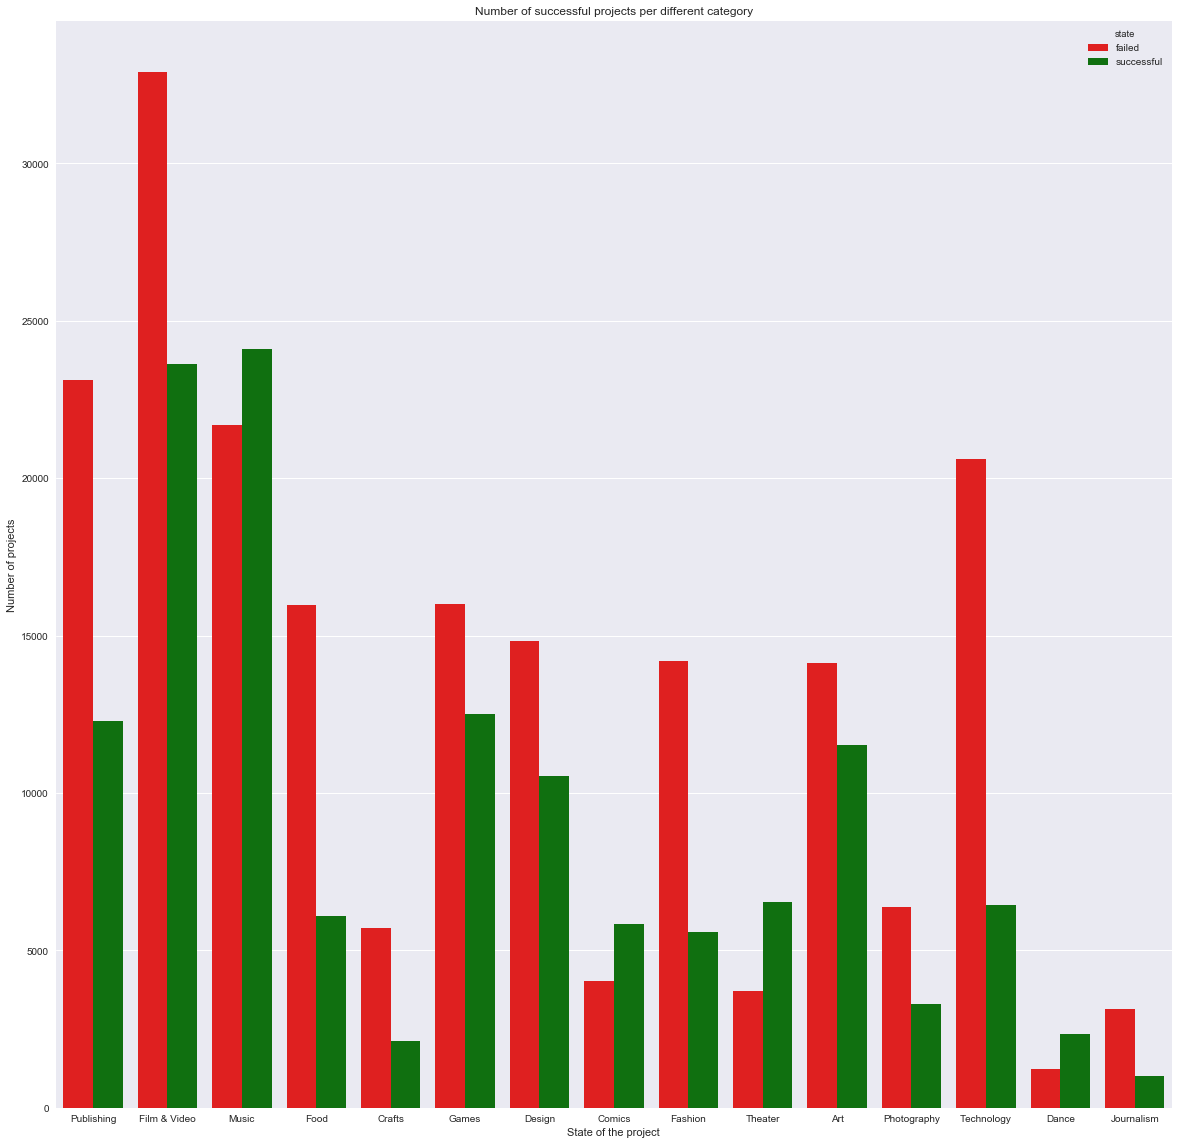

In [107]:
fig, ax = plt.subplots(figsize=(20,20))
p1 = sns.catplot(data=df, ax = ax, kind='count',x='main_category',hue='state',
            palette=["red", "green"])
ax.set(xlabel='State of the project',
       ylabel='Number of projects', title = 'Number of successful projects per different category')
plt.close(p1.fig)
plt.show()

**(b)**

**Data dictionary**

**name**                   The name of the project

**category**               Category of the project (nested)

**main_category**          Root level category of the project

**currency**               Currency code used to raise money

**deadline**               Timestamp of deadile

**goal**                   Goal amount in the currency of the project

**launched**               Timestamp of launch

**pledged**                Amount pledged in the currency of the project

**state**                  If the project was successful or failed

**backers**                Number of people who pledged for the project

**country**                Country of the project

**usd pledged**            Amount pledged in USD

**usd_pledged_real**       Amount pledged in USD (difference between the two is unclear

**usd_goal_real**          Goal of the project in USD




**Our target variable is "state". Please refer to the plots above for analysis of state and different predictors**

**Following preprocessing was done**

1. We have only kept states which are "successful" or "failed". We have removed cancelled entries. Since we are not sure what do they mean

2. We have removed rows with null values of usd_pledged_real and name. 

3. We found that there are no duplicate IDs, so no action was taken there

**Please refer to the code below to see the change in dimensions of the data, post preprocessing. Almost 4000 rows of 370,000 rows were removed**

**(d)**

We will be using Logistic regression for our supervised learning algorithm

1. Since our outcome is a binary outcome, using a sigmoid function will give us desired probabilities for each class
2. It handles multiple explanatory variables well
3. Also, it will help us better understand the impact different predictors have on a project being successful


**(e)**

We will be using ROC curve to evauluate our model to see the overall accuracy of our model. We don't have any preference towards reducing False positives or False negatives, and we are just interested in the accuracy of our model

**(f)**

We will be using cross validation in this case 
1. to reduce variability
2. prevent overfitting the data
3. obtain accuracy of our model

In [160]:
### Drop columns we won't need
df_new = df.drop(['name', 'category', 'currency', 'launched',
                          'pledged', 'usd pledged', 'ID',
                          'country', 'deadline'], axis=1)

### Convert state to a binary variable
df_new['state'] = df_new['state'].replace({'failed': 0, 'successful': 1})

### Convert some variable into dummies
df_new = pd.get_dummies(df_new)


### Convert dataframe objects 
X = df_new.drop('state', axis=1)
y = df_new.state

### Lets rescale values to 0-1
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
X.head()

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
## We scale the dummy variables as well, to normaize categories with less data

In [161]:
skf = StratifiedKFold(n_splits=2)
i = 0
prediction_data = []
for train_index, test_index in skf.split(X, y):
    X_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]
    clf = LogisticRegression(max_iter = 5000, solver='saga')
    fit = clf.fit(X_train, y_train)
    prediction_probas = fit.predict_proba(X_test)
    predictions = fit.predict(X_test)
    prediction_data.append({
        "predictions": predictions,
        "fit": fit,
        "predict_probas": prediction_probas,
        "y_test": y_test
    })
    

/Users/ishangupta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [178]:
fpr, tpr, thresholds = roc_curve(prediction_data[1]['y_test'].values, 
                                 prediction_data[1]['predict_probas'][:,1])

area_under_curve = round(auc(fpr, tpr),3)

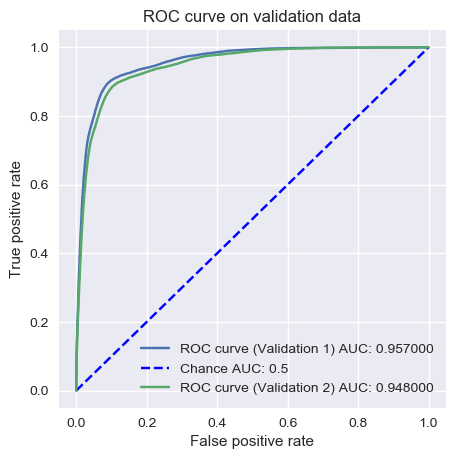

In [184]:
plt.figure(num=None, figsize=(5, 5), dpi=100)
fpr, tpr, thresholds = roc_curve(prediction_data[0]['y_test'].values, 
                                 prediction_data[0]['predict_probas'][:,1])
area_under_curve = round(auc(fpr, tpr),3)
plt.plot(fpr, tpr,
         label='ROC curve (Validation 1) AUC: %f' % (area_under_curve))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color='b',
         label='Chance AUC: 0.5')

fpr, tpr, thresholds = roc_curve(prediction_data[1]['y_test'].values, 
                                 prediction_data[1]['predict_probas'][:,1])
area_under_curve = round(auc(fpr, tpr),3)

plt.plot(fpr, tpr,
         label='ROC curve (Validation 2) AUC: %f' % (area_under_curve))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve on validation data")
plt.legend()
plt.show()

**(g)**

Refer to the plot above and the data plots which were shown in the EDA

**(h)**

We got an AUC of 0.957 and 0.948. There is still some variability in the area under ROC. We could not increase the split size because of computational complexity. Our classifier is doing well on separating both the classes (companies that fail vs. companies that succeed). We can say this because our classes don't suffer from imbalance. It is a 70-30 of failure to success ratio which is pretty decent. We won't proceed with the confusion matrix because we are not interested in minimizing either of false positives or false negatives.

We could improve it by:
i) Bringing in more data - This is just one month of data.
ii) See the effect of other variables which can be obtained by parsing the page
iii) Computation improvement - Check it for validation splits. See if the variance in different splits still exists.